Safety score

In [21]:
import numpy as np
import json 

def calculate_safety_score(theta, t, alpha, beta, sigma, eta):
    if t < theta:
        return sigma * (alpha * (theta**2 - t**2) + beta * (theta - t))
    else:
        return eta * (alpha * (theta**2 - t**2) + beta * (theta - t))

def calculate_path_safety_score(perfect_path, driven_path, alpha, beta, sigma, eta):
    safety_score = 0
    for i in range(len(perfect_path)):
        theta = np.sqrt(perfect_path[i][0]**2 + perfect_path[i][1]**2)
        t = np.sqrt((driven_path[i][0] - perfect_path[i][0])**2 + (driven_path[i][1] - perfect_path[i][1])**2)
        safety_score += calculate_safety_score(theta, t, alpha, beta, sigma, eta)
    return safety_score

def calculate_path_safety_score_AB(perfect_path, driven_path, alpha, beta, sigma, eta, velocity, acceleration):
    safety_score = 0
    for i in range(len(perfect_path)):
        theta = np.sqrt(perfect_path[i][0]**2 + perfect_path[i][1]**2)
        t = np.sqrt((driven_path[i][0] - perfect_path[i][0])**2 + (driven_path[i][1] - perfect_path[i][1])**2)
        alpha_i = alpha*(1+acceleration)
        beta_i = beta*(1+velocity)
        safety_score += calculate_safety_score(theta, t, alpha_i, beta_i, sigma, eta)
    return safety_score


# Load the perfect and driven path JSON files
with open('user_input/scenario_0.json') as f:
    perfect_path_data = json.load(f)
    
with open('user_input/scenario_1.json') as f:
    driven_path_data = json.load(f)

# Extract the vehicle locations as tuples from the JSON files
perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

if len(driven_path) < len(perfect_path):
    last_item = driven_path[-1]
    driven_path += [last_item] * (len(perfect_path) - len(driven_path))
elif len(perfect_path) < len(driven_path):
    last_item = perfect_path[-1]
    perfect_path += [last_item] * (len(driven_path) - len(perfect_path))

alpha = 1 # alpha,beta - Indicating the velocity and acceleration of an AV and surrounding vehicles 
beta = 1
sigma = 1 # Reward or penalty on the level of safety, when $t$ is lower or higher than $\theta$, respectively
eta = 1
velocity = 30 # 30 km/h  velocity of vehicles around? 
acceleration = 0.5  # 0.5 m/s^2 acceleration of vehicles around?
score = calculate_path_safety_score_AB(perfect_path, driven_path, alpha, beta, sigma, eta, velocity, acceleration)
print("Safety score: " + str(score))

Safety score: 892545.2271516911


Dynamic time warping
Dynamic time warping (DTW) is an algorithm for measuring similarity between two temporal sequences, which may vary in speed. 
For instance, similarities in walking could be detected using DTW, even if one person was walking faster than the other, 
or if there were accelerations and decelerations during the course of an observation. 

In [33]:
import numpy as np
from dtw import *

# Define a distance function to use with DTW (here, we use Euclidean distance)
def distance_func(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))

# Compute the similarity value using DTW
d, _, _, _ = dtw(perfect_path, driven_path, dist=distance_func)
similarity = -d

print("DTW: "+ str(similarity))

DTW: -255.8199896963548


In [32]:
from dtw import dtw
import numpy as np
import math

def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)


# Extract the vehicle locations as tuples from the JSON files
perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

# Convert the paths to numpy arrays
perfect_path_array = np.array(perfect_path)
driven_path_array = np.array(driven_path)

# Calculate the DTW distance between the two paths
distance,_,_,_= dtw(perfect_path_array, driven_path_array,dist=euclidean_distance)

# Print the DTW distance
print("DTW distance:", distance)

DTW distance: 255.8199896963548


Paths plotted as graphs

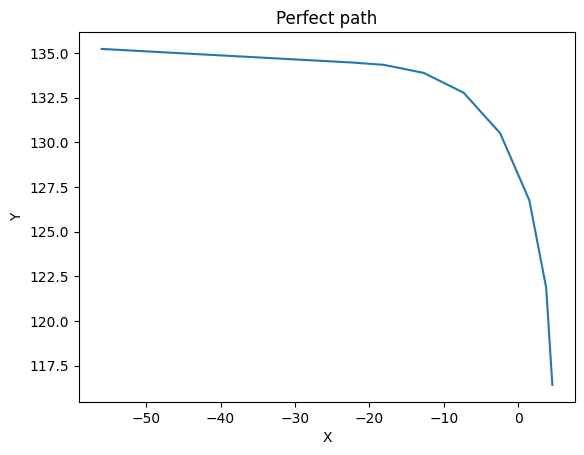

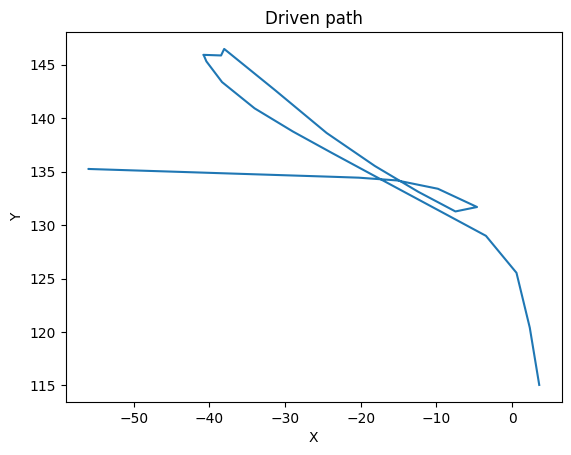

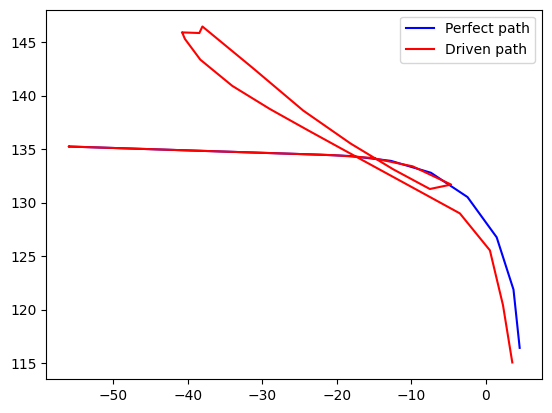

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the perfect and driven path JSON files
with open('user_input/scenario_0.json') as f:
    perfect_path_data = json.load(f)
    
with open('user_input/scenario_1.json') as f:
    driven_path_data = json.load(f)

# Extract the vehicle locations as tuples from the JSON files
perfect_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in perfect_path_data]
driven_path = [(d['vehicle_location']['x'], d['vehicle_location']['y']) for d in driven_path_data]

# Plot the perfect path
plt.plot(*zip(*perfect_path))
plt.title('Perfect path')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot the driven path
plt.plot(*zip(*driven_path))
plt.title('Driven path')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot both paths on the same graph
plt.plot([x for x, y in perfect_path], [y for x, y in perfect_path], 'b-', label='Perfect path')
plt.plot([x for x, y in driven_path], [y for x, y in driven_path], 'r-', label='Driven path')
plt.legend()
plt.show()